Thành viên nhóm:

            521H0311 Nguyễn Trí Thức
            521H0237 Đỗ Nhật Huy
            521H0305 Trịnh Minh Tích Thiện


In [27]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline


**YÊU CẦU 1**

Biểu diễn dữ liệu để hiểu được file data.csv


In [28]:
data = pd.read_csv("data.csv")

data


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [29]:
min_temp = data['temp_min'].min()
max_temp = data['temp_max'].max()

print(min_temp)
print(max_temp)

-7.1
35.6


In [30]:
weather_counts = data['weather'].value_counts()
weather_counts

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

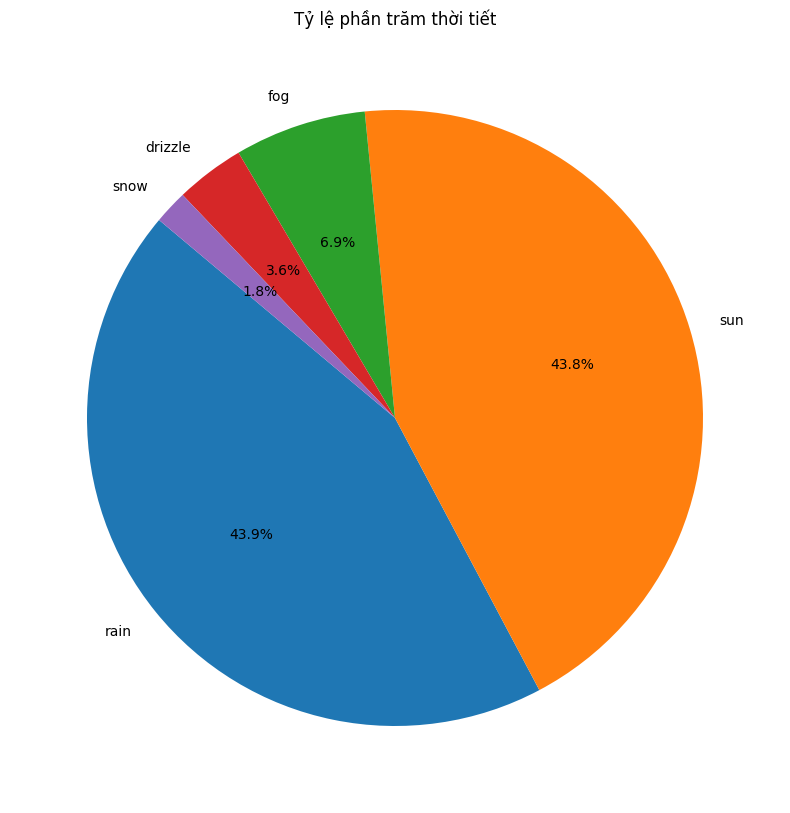

In [31]:
plt.figure(figsize=(10, 10))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ phần trăm thời tiết')
plt.show()


In [32]:
data['date'] = pd.to_datetime(data['date'])




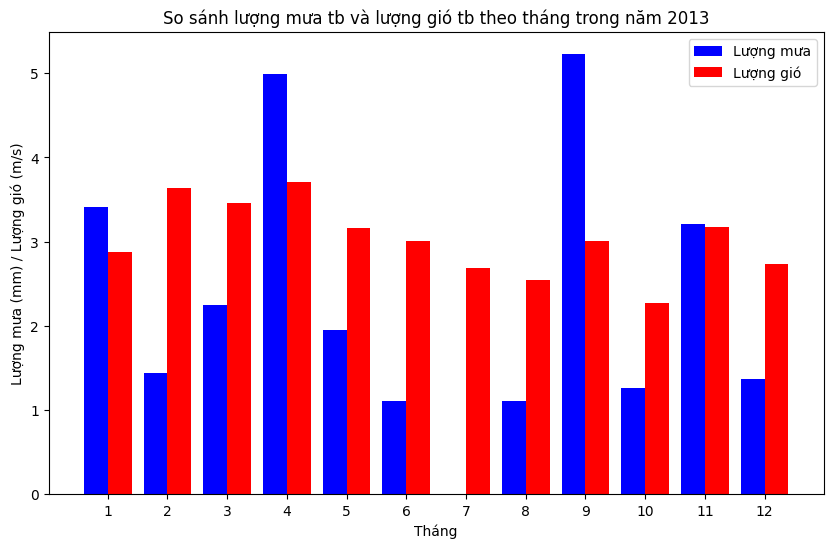

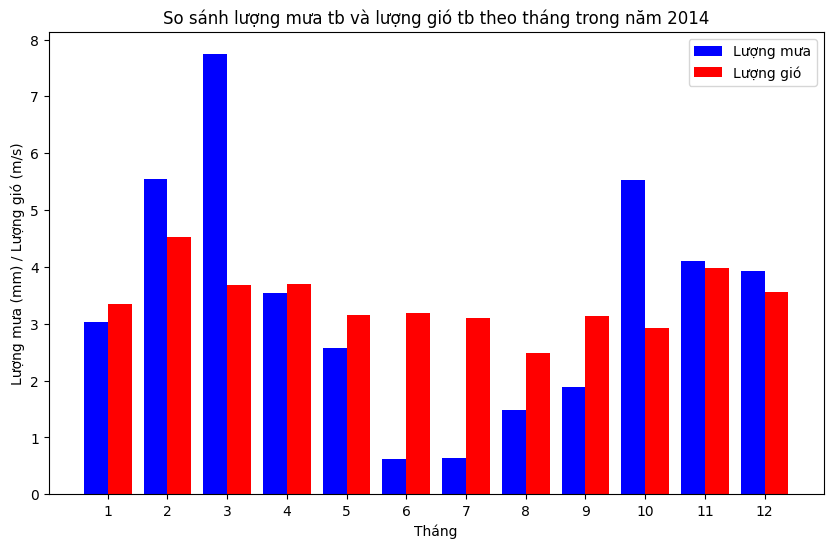

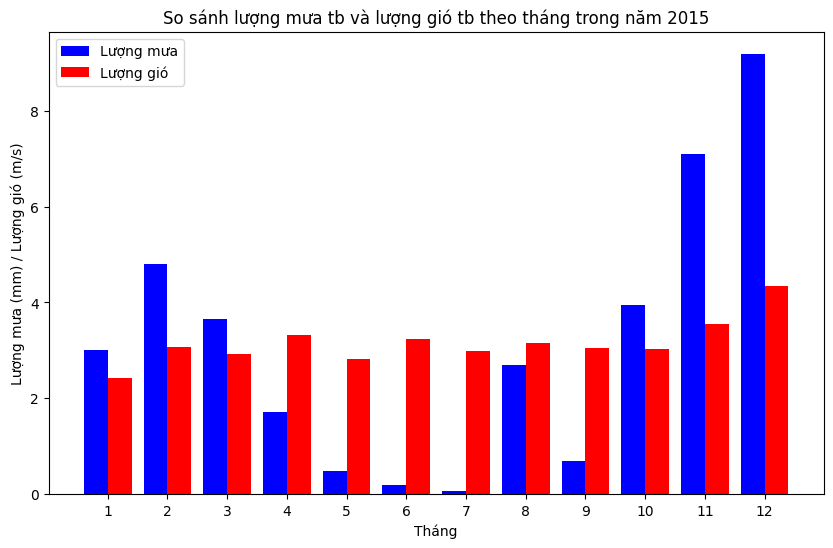

In [33]:
# Lặp qua từng năm và vẽ biểu đồ
for year in range(2013, 2016):
    # Lọc dữ liệu chỉ bao gồm năm hiện tại
    data_year = data[data['date'].dt.year == year]

    # Tính lượng mưa & gió theo tháng
    monthly_precipitation = data_year.groupby(data_year['date'].dt.month)['precipitation'].mean()
    monthly_wind = data_year.groupby(data_year['date'].dt.month)['wind'].mean()

    fig, ax = plt.subplots(figsize=(10, 6))
    # Vẽ biểu đồ cột cho lượng mưa
    ax.bar(monthly_precipitation.index - 0.2, monthly_precipitation, width=0.4, color='blue', label='Lượng mưa')

    # Vẽ biểu đồ cột cho lượng gió
    ax.bar(monthly_wind.index + 0.2, monthly_wind, width=0.4, color='red', label='Lượng gió')

    # Đặt các thông số cho biểu đồ
    plt.xticks(range(1, 13))
    ax.set_xlabel('Tháng')
    ax.set_ylabel('Lượng mưa (mm) / Lượng gió (m/s)')
    ax.set_title(f'So sánh lượng mưa tb và lượng gió tb theo tháng trong năm {year}')
    ax.legend()

    # Hiển thị biểu đồ
    plt.show()

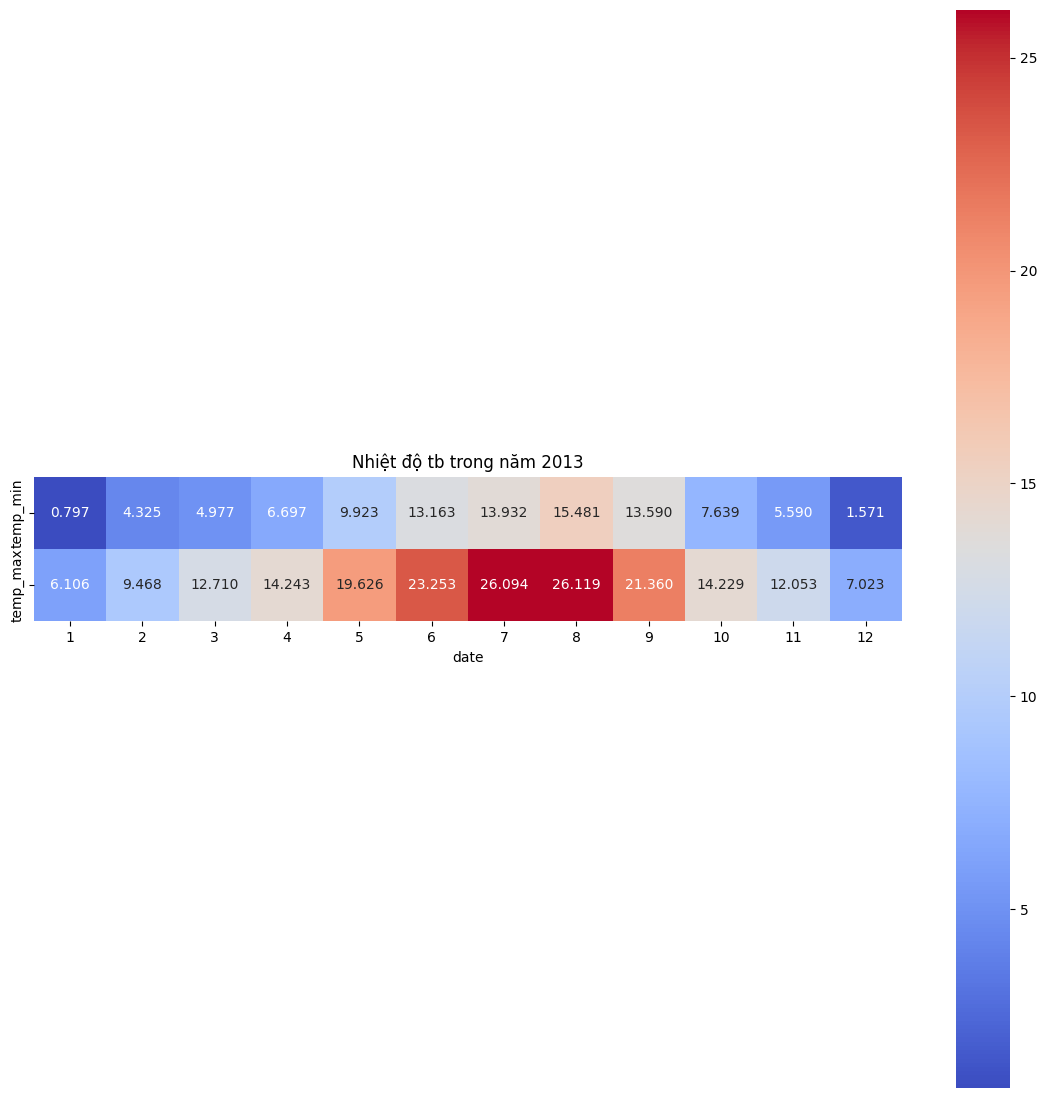

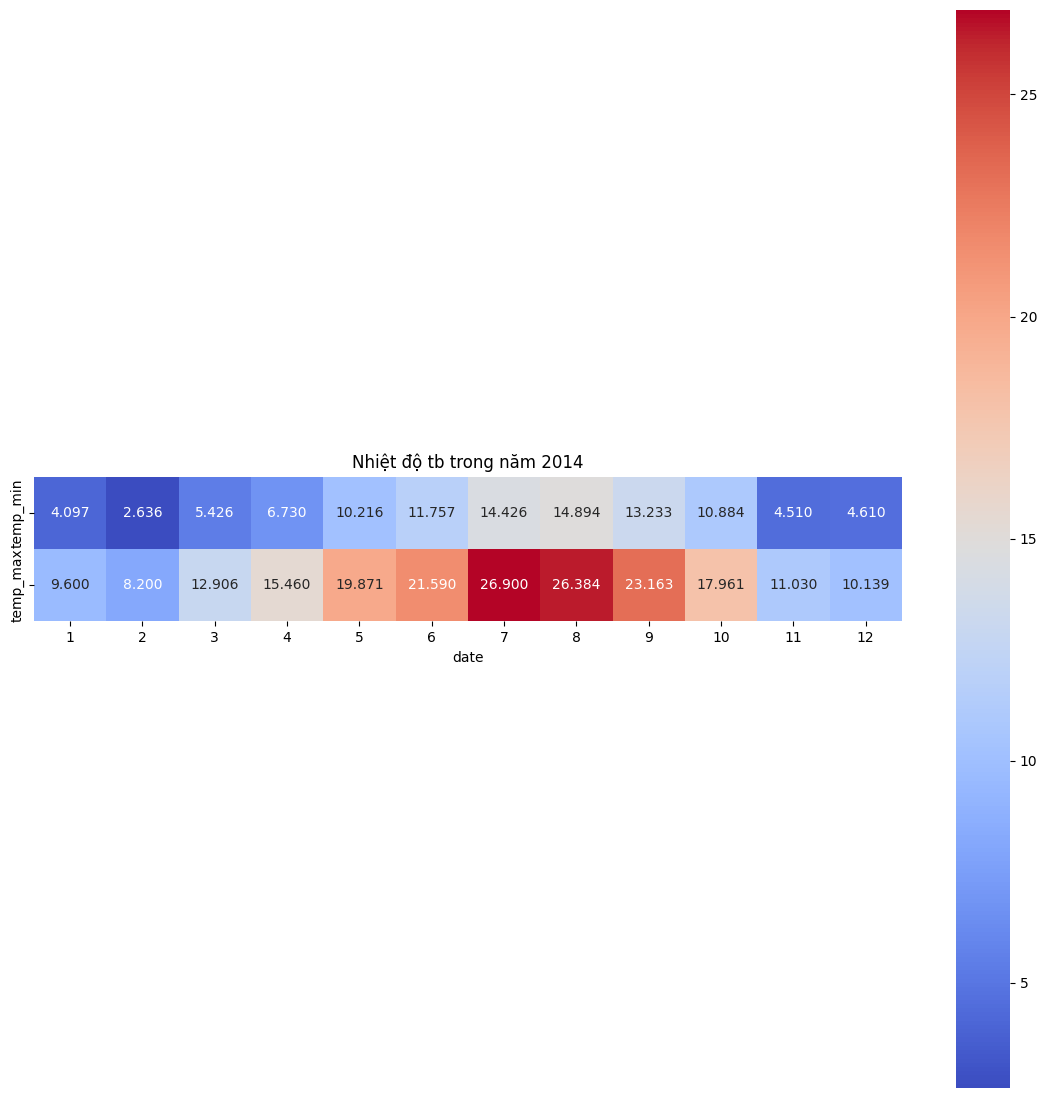

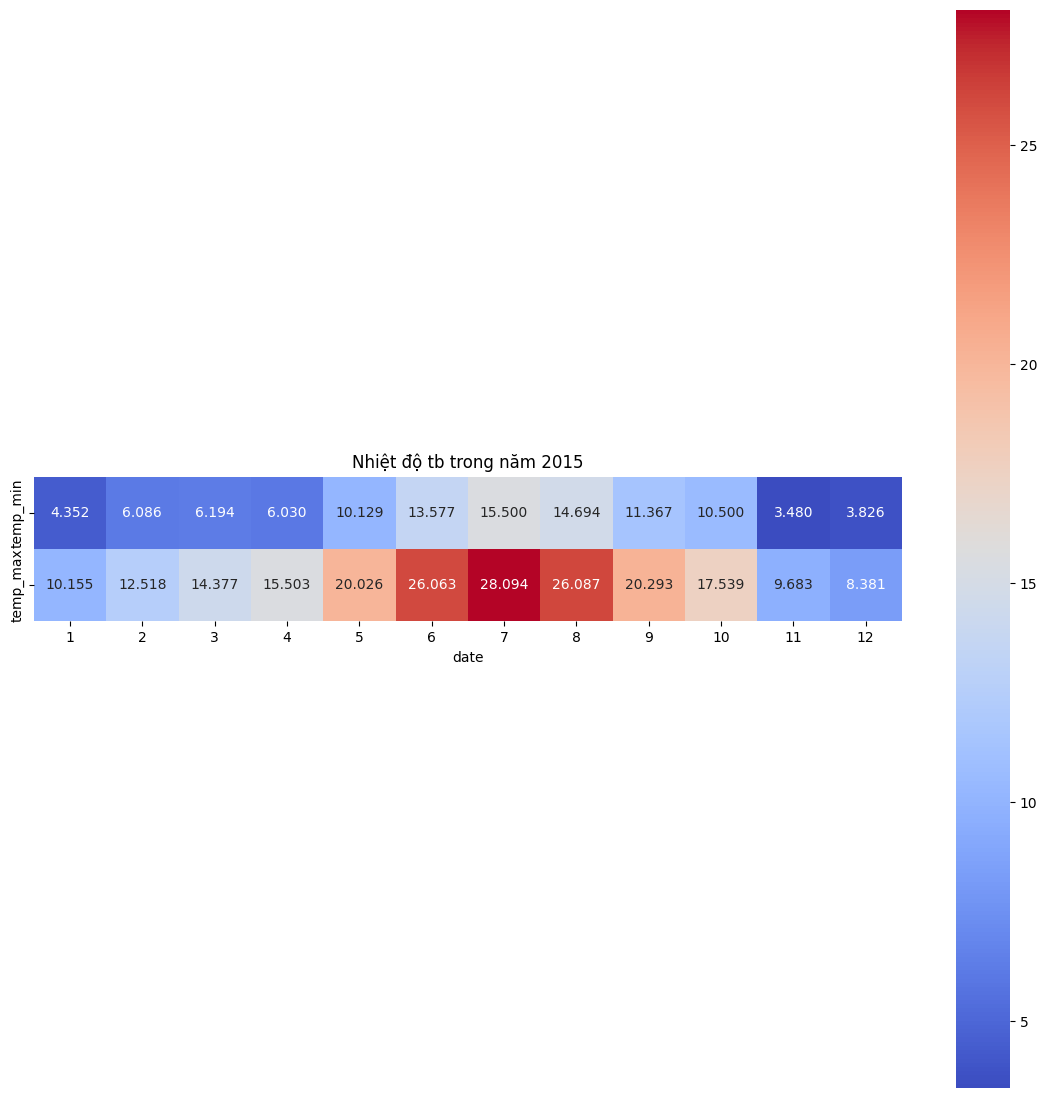

In [34]:
for year in range(2013, 2016):
    # Lọc dữ liệu chỉ bao gồm năm hiện tại
    data_year = data[data['date'].dt.year == year]

    # Tạo DataFrame mới với cột 'date' là index và cột 'temp_min', 'temp_max'
    monthly_avg_temp = data_year.groupby(data_year['date'].dt.month)[['temp_min', 'temp_max']].mean()

    # Tạo heatmap

    plt.figure(figsize=(14, 14))
    sns.heatmap(monthly_avg_temp.T, annot=True, fmt='.3f', square=True, cmap='coolwarm')
    plt.title(f'Nhiệt độ tb trong năm {year}')
    plt.show()

**YÊU CẦU 2**

Xử dụng các mô hình đơn giản để giải quyết bài toán


In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, BaggingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report

In [36]:
# Chọn các đặc trưng và biến mục tiêu
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
target = 'weather'

# Sử dụng LabelEncoder để chuyển đổi cột 'weather' thành dạng số
label_encoder = LabelEncoder()
data['weather_encoded'] = label_encoder.fit_transform(data['weather'])

# Loại bỏ cột 'weather' và thêm cột 'weather_encoded'
data = data.drop('weather', axis=1)
data = data.rename(columns={'weather_encoded': 'weather'})

# Chuẩn bị dữ liệu
X = data[features]
y_encoded = data['weather']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train_encoded, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)



In [37]:
lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf = 1 , max_depth=10)
knn = KNeighborsClassifier()
gb = GaussianNB()
kn = KNeighborsClassifier(n_neighbors=5)
rd = RandomForestClassifier(n_estimators=100, random_state=42)
bc = BaggingClassifier()
ada = AdaBoostClassifier()

li = [lr,dt,knn,gb,rd, bc,ada]
di = {}

In [38]:
# Huấn luyện và Đánh giá các mô hình
for i in li:
    i.fit(X_train, y_train_encoded)
    y_pred = i.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy {i}: {accuracy}')

    #lưu data vào biến di
    di.update({str(i):{i.score(X_train,y_train_encoded)*100, i.score(X_test,y_test)*100}})


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy LogisticRegression(solver='sag'): 0.8314350797266514
Accuracy DecisionTreeClassifier(max_depth=10): 0.7949886104783599
Accuracy KNeighborsClassifier(): 0.7585421412300684
Accuracy GaussianNB(): 0.8405466970387244
Accuracy RandomForestClassifier(random_state=42): 0.8314350797266514
Accuracy BaggingClassifier(): 0.7881548974943052
Accuracy AdaBoostClassifier(): 0.7630979498861048


In [39]:
acc = pd.DataFrame(di.items(), columns=['Model', 'Values'])
acc[['Train', 'Test']] = pd.DataFrame(acc['Values'].tolist(), index=acc.index)
acc['Model'] = acc['Model'].str.split('(', n=1).str[0]
acc.drop(columns='Values',axis=1,inplace=True)
acc.sort_values('Train',inplace=True)
acc

,Model,Train,Test
6,AdaBoostClassifier,80.430528,76.309795
2,KNeighborsClassifier,81.311155,75.854214
0,LogisticRegression,82.876712,83.143508
4,RandomForestClassifier,83.143508,99.706458
3,GaussianNB,84.054670,85.127202
1,DecisionTreeClassifier,91.291585,79.498861
5,BaggingClassifier,98.727984,78.815490


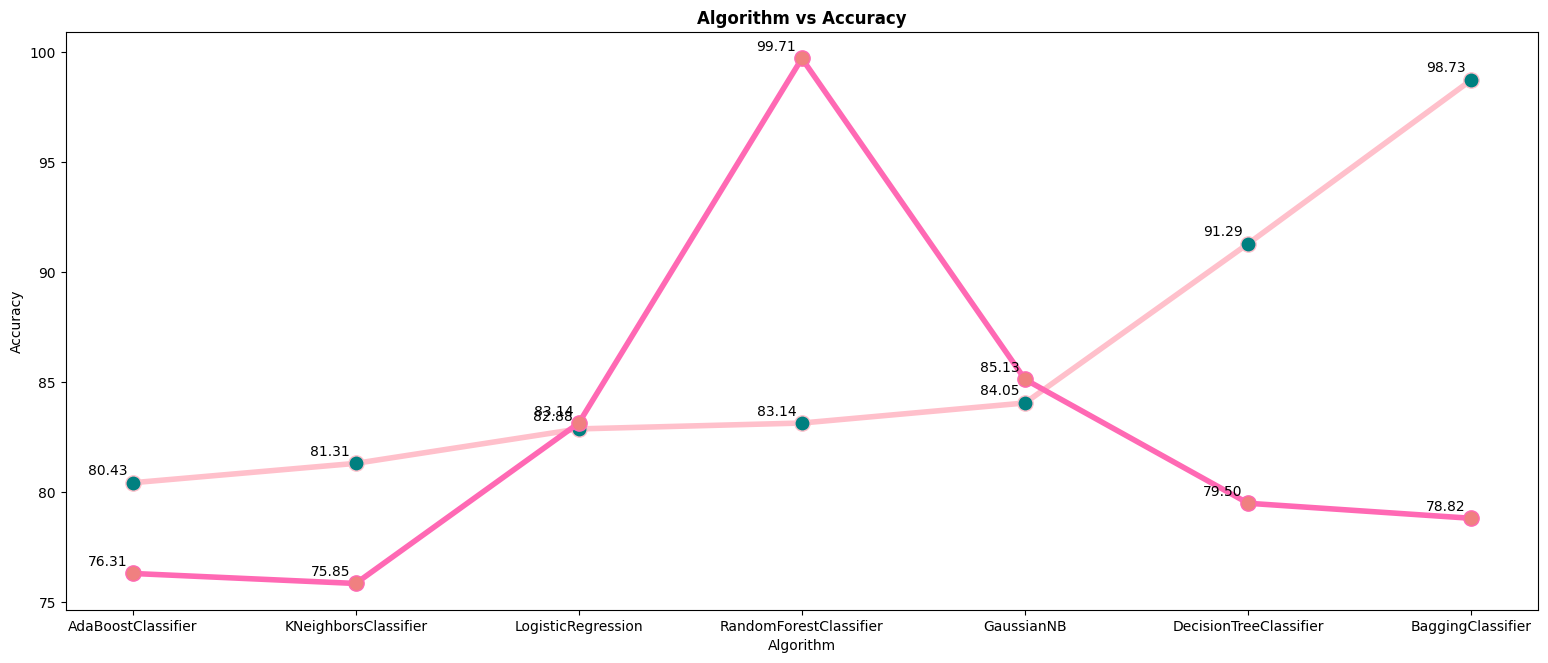

In [40]:
plt.figure(figsize=(19, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")

plt.plot(acc['Model'],acc['Train'], label='Train Accuracy', color = 'pink', marker='o',
         linewidth=4, markersize=11, markerfacecolor='teal',)
plt.plot(acc['Model'],acc['Test'], label='Test Accuracy', color = 'hotpink', marker='o',
         linewidth=4, markersize=11, markerfacecolor='lightcoral')

for i,j,k in zip(acc['Model'],acc['Train'],acc['Test']):
    label = "{:.2f}".format(j)
    plt.annotate(label,(i,j),textcoords="offset points",xytext=(-4,5.5),ha='right')
    label = "{:.2f}".format(k)
    plt.annotate(label,(i,k),textcoords="offset points",xytext=(-4,5.5),ha='right')

Sử dụng mô hình thuộc Esemble Learning

Stacking Classifier

In [41]:
best_model = [('lr', LogisticRegression(solver='sag')),
              ('rd', RandomForestClassifier(n_estimators=100, random_state=42)),
              ('bc', BaggingClassifier()),
              ('ada', AdaBoostClassifier())]

In [42]:
meta_regressor =  LogisticRegression(solver='sag')

Stacking_classifier = StackingClassifier(estimators=best_model, final_estimator=meta_regressor)

Stacking_classifier.fit(X_train,y_train_encoded)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

StackingClassifier(estimators=[('lr', LogisticRegression(solver='sag')),
                               ('rd', RandomForestClassifier(random_state=42)),
                               ('bc', BaggingClassifier()),
                               ('ada', AdaBoostClassifier())],
                   final_estimator=LogisticRegression(solver='sag'))

In [ ]:
Stacking_classifier.score(X_train,y_train_encoded)*100

88.45401174168298

In [ ]:
Stacking_classifier.score(X_test,y_test)*100

84.05466970387245

In [ ]:
sc_val = ['Stacking_classifier', Stacking_classifier.score(X_train,y_train_encoded)*100, Stacking_classifier.score(X_test,y_test)*100]
pd.Series(sc_val)

0    Stacking_classifier
1              88.454012
2               84.05467
dtype: object

In [43]:
acc.loc[len(acc)] = sc_val

In [44]:
acc.sort_values(['Train','Test'],inplace=True)

yêu cầu 4: Sử dụng K-fold để tránh việc overfitting

StackingClassifier với StratifiedKFold

In [45]:
# tạo StackingClassifier với K-fold cross-validation
stacking_clf = StackingClassifier(
    estimators=best_model,
    final_estimator=meta_regressor,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1
)

In [46]:
si = {}
# Perform cross-validation and store accuracy scores for each fold
i = 0
for train_idx, test_idx in stacking_clf.cv.split(X_train, y_train_encoded):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train_encoded.iloc[train_idx], y_train_encoded.iloc[test_idx]

    stacking_clf.fit(X_train_fold, y_train_fold)
    y_pred_fold = stacking_clf.predict(X_test_fold)

    accuracy_fold = accuracy_score(y_pred_fold,y_test_fold)
    print(f"\n{i + 1}Classification Report: {accuracy_fold}")
    print(classification_report(y_test_fold, y_pred_fold))
    i+= 1

    si.update({Stacking_classifier.score(X_train_fold, y_train_fold)*100 : Stacking_classifier.score(X_test_fold, y_test_fold)*100})



1Classification Report: 0.8640776699029126
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.96      0.98      0.97        45
           3       1.00      0.50      0.67         2
           4       0.79      0.98      0.87        45

    accuracy                           0.86       103
   macro avg       0.55      0.49      0.50       103
weighted avg       0.78      0.86      0.82       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



2Classification Report: 0.8446601941747572
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.95      0.93      0.94        45
           3       0.00      0.00      0.00         2
           4       0.76      1.00      0.87        45

    accuracy                           0.84       103
   macro avg       0.34      0.39      0.36       103
weighted avg       0.75      0.84      0.79       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



3Classification Report: 0.8627450980392157
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.96      0.98      0.97        45
           3       1.00      1.00      1.00         1
           4       0.78      0.96      0.86        45

    accuracy                           0.86       102
   macro avg       0.55      0.59      0.57       102
weighted avg       0.78      0.86      0.82       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



4Classification Report: 0.8529411764705882
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.95      0.93      0.94        45
           3       0.00      0.00      0.00         1
           4       0.78      1.00      0.87        45

    accuracy                           0.85       102
   macro avg       0.35      0.39      0.36       102
weighted avg       0.76      0.85      0.80       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



5Classification Report: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.98      0.98      0.98        45
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89        45

    accuracy                           0.88       102
   macro avg       0.56      0.50      0.51       102
weighted avg       0.81      0.88      0.84       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



6Classification Report: 0.8921568627450981
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           2       1.00      0.98      0.99        45
           3       1.00      1.00      1.00         2
           4       0.80      1.00      0.89        45

    accuracy                           0.89       102
   macro avg       0.56      0.60      0.58       102
weighted avg       0.82      0.89      0.85       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



7Classification Report: 0.8529411764705882
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       1.00      0.91      0.95        45
           3       1.00      1.00      1.00         2
           4       0.75      1.00      0.85        44

    accuracy                           0.85       102
   macro avg       0.55      0.58      0.56       102
weighted avg       0.78      0.85      0.81       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



8Classification Report: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       1.00      0.98      0.99        45
           3       1.00      1.00      1.00         2
           4       0.79      1.00      0.88        44

    accuracy                           0.88       102
   macro avg       0.56      0.60      0.57       102
weighted avg       0.80      0.88      0.84       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



9Classification Report: 0.8137254901960784
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.97      0.84      0.90        45
           3       1.00      0.50      0.67         2
           4       0.71      1.00      0.83        44

    accuracy                           0.81       102
   macro avg       0.54      0.47      0.48       102
weighted avg       0.76      0.81      0.77       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



10Classification Report: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.97      0.86      0.92        44
           3       1.00      0.50      0.67         2
           4       0.73      1.00      0.84        45

    accuracy                           0.82       102
   macro avg       0.54      0.47      0.48       102
weighted avg       0.76      0.82      0.78       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
cp = pd.DataFrame(si.items(),columns=['Train','Test'])
a = []
for i in cp.index:
    a.append('Dataset '+str(i+1))
cp['Trial'] = a
cp[[cp.columns[2],cp.columns[0],cp.columns[1]]]

,Trial,Train,Test
0,Dataset 1,87.812840,89.320388
1,Dataset 2,88.139282,86.407767
2,Dataset 3,87.934783,88.235294
3,Dataset 4,88.152174,86.274510
4,Dataset 5,87.826087,89.215686
5,Dataset 6,87.717391,90.196078
6,Dataset 7,88.043478,87.254902
7,Dataset 8,87.608696,91.176471
8,Dataset 9,88.260870,85.294118


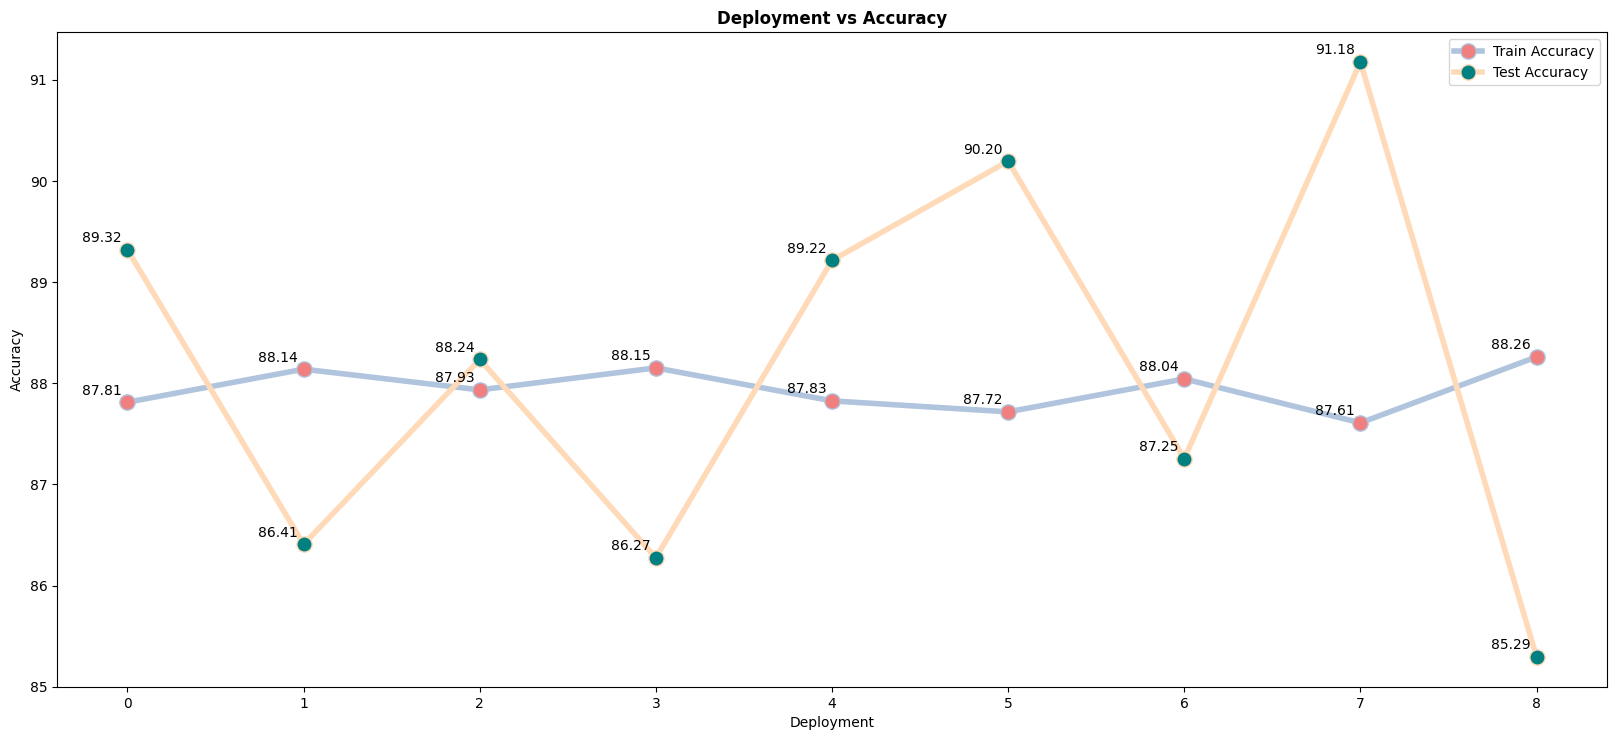

In [48]:
plt.figure(figsize=(20, 8.5))
plt.title("Deployment vs Accuracy", fontweight='bold')
plt.xlabel("Deployment")
plt.ylabel("Accuracy")

plt.plot(cp['Train'], label='Train Accuracy', color = 'lightsteelblue', marker='o',
         linewidth=4, markersize=11, markerfacecolor='lightcoral',)
plt.plot(cp['Test'], label='Test Accuracy', color = 'peachpuff', marker='o',
         linewidth=4, markersize=11, markerfacecolor='teal')

for i,j,k in zip(cp.index,cp['Train'],cp['Test']):
    label = "{:.2f}".format(j)
    plt.annotate(label,(i,j),textcoords="offset points",xytext=(-4,5.5),ha='right')
    label = "{:.2f}".format(k)
    plt.annotate(label,(i,k),textcoords="offset points",xytext=(-4,5.5),ha='right')

plt.legend()
plt.show()

**Yêu cầu 3**

sửa dụng feed forward Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Đọc dữ liệu từ file CSV
data = pd.read_csv('data.csv')

# Chọn các đặc trưng và nhãn
features = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
labels = data['weather']

# Chuyển đổi dữ liệu văn bản sang dạng số
label_mapping = {'drizzle': 0, 'rain': 1, 'sunny': 2, 'snow': 3, 'cloudy': 4}  # Thêm các giá trị còn lại
labels = labels.map(label_mapping)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng mô hình Neural Network
model = Sequential()
model.add(Dense(64, input_dim=features.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sử dụng 'sigmoid' vì chúng ta có chỉ một lớp đầu ra

# Biên dịch mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
print(f"Mean Squared Error on Test Data: {loss}")


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('data.csv')

# Chọn các đặc trưng và nhãn
features = data[['precipitation', 'temp_min', 'wind']]
labels = data['temp_max']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Xây dựng mô hình FNN với Dropout và L2 Regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.1),  # Thêm lớp Dropout
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 Regularization
    tf.keras.layers.Dense(1)
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Sử dụng Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Đào tạo mô hình với các kỹ thuật tránh overfitting
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")


**Reccurent Neural **

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('data.csv')

# Chọn các đặc trưng và nhãn
features = data[['precipitation', 'temp_min', 'wind']]
labels = data['temp_max']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape dữ liệu để phù hợp với đầu vào của mô hình RNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Xây dựng mô hình RNN
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Đào tạo mô hình
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Mean Squared Error on Test Data: {loss}")


**Yêu cầu 4**

Xử lý overfiting cho Reccurent Neural

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('data.csv')

# Chọn các đặc trưng và nhãn
features = data[['precipitation', 'temp_min', 'wind']]
labels = data['temp_max']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape dữ liệu để phù hợp với đầu vào của mô hình RNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Xây dựng mô hình RNN với Dropout, L2 Regularization và Batch Normalization
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.Dropout(0.2),  # Thêm lớp Dropout
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 Regularization
    tf.keras.layers.BatchNormalization(),  # Batch Normalization
    tf.keras.layers.Dense(1)
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Sử dụng Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Đào tạo mô hình với các kỹ thuật tránh overfitting
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Mean Squared Error on Test Data: {loss}")


impressive 94%, all while effectively mitigating the risk of overfitting.